# Day Three: Transforming Data with Pandas

As always, import pandas using the conventional alias `pd` and set `max_columns` to None so that all columns are displayed.

In [3]:
import pandas as pd
pd.options.display.max_columns = None
print(pd.__version__)

2.3.3


## Processing JSON Files in Pandas: An Example API

First, let's look at the structure of an example JSON query result in both the browser and in Python. Today, we'll be focusing on statistics regarding the usage and expenditures of public libraries in Oregon.

This [Oregon Public Library Stastistics API](https://dev.socrata.com/foundry/data.oregon.gov/8zw7-zgjw) queries a database and retrieves all entries (that fit within a single JSON) that meet the selection requirements. The following query [https://data.oregon.gov/resource/8zw7-zgjw.json?year=2024](https://data.oregon.gov/resource/8zw7-zgjw.json?year=2024) returns information about public libraries in Oregon in the year 2024.

When opening the query in a browser like Firefox, you will notice that it looks like a **list** of **dictionaries**.

### Reading JSONS

Pandas supports conversion of JSON files to DataFrames through the [**pd.read_json()**](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html) function. Parsing JSON files with nested structure will require more tuning of parameters, but the default arguments will work for this simple API.

In [4]:
URL = "https://data.oregon.gov/resource/8zw7-zgjw.json?year=2024"
libraries = pd.read_json(URL)
libraries.head(5) # Peek at the first five rows

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.0,21.0,0.00,0.62,0.00,0,0,False,False,0,0,1,1,0.0,0.0,49676.27,1000,7030,0.0,35036.0,0.0,0.0,0.0,0.0,31065.77,0.00,8672.86,0.00,0.00,11831.97,0.0,0.0,0.0,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.0,149.0,464.0,175.0,504.0,230.0,0.0,0.0,542.0,412.0,439.0,19,500,0,495,0,0.0,N/A (we do not track reference transactions),77.0,True,101,498,48.0,120.0,53.0,378.0,53.0,378.0,16.0,96.0,53.0,378,0,0,0,0,8.0,50.0,323.0,Actual count (we track each transaction as it ...,3,

Let's use `.info()` to get a little more information about this DataFrame.

In [5]:
libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Columns: 173 entries, libid to capitalbondenddate
dtypes: bool(9), float64(73), int64(59), object(32)
memory usage: 175.6+ KB


This dataset has more columns than Pandas will automatically summarize for you.
However, this dataset is fully documented on its homepage on the [Oregon Data Portal](https://data.oregon.gov/dataset/Oregon-Public-Library-Statistics/8zw7-zgjw/about_data).

## Inferring Columns in DataFrames

Sometimes we want to change values in DataFrames in a systematic way. Let's start with the creation of new columns as a function of **other columns**. 

Operations on Series are vectorized. The word *vectorized* means that an operation is applied to each individual entry in the Series. Let's make a toy
Series using the **pd.Series** constructor.

In [6]:
one_to_five = pd.Series([1,2,3,4,5]) # Indexed 0-4 by default
one_to_five

0    1
1    2
2    3
3    4
4    5
dtype: int64

One way to manipulate a Series is to add a scalar constant to each value. Notice that the *values* of the Series change but that its index stays the same.

In [7]:
one_to_five + 5

0     6
1     7
2     8
3     9
4    10
dtype: int64

Multiplication by a scalar is also vectorized.

In [8]:
one_to_five * 7


0     7
1    14
2    21
3    28
4    35
dtype: int64

In order to use a DataFrame or Series as an argument to a function, the function must accept array-like input. For example,
I cannot use the [**math.sqrt**](https://docs.python.org/3/library/math.html#math.sqrt) function on the Series one_to_five in this form. The math.sqrt function, expecting a scalar, will throw a **TypeError**.

In [9]:
import math
math.sqrt(one_to_five)

TypeError: cannot convert the series to <class 'float'>

However, the numpy.sqrt function can take in a Series as input because its expect an array-like set of floats or integers.

In [ ]:
import numpy as np
np.sqrt(one_to_five)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

To vectorize arbitrary functions to each value in a Series, use [**Series.map()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas.Series.map) followed by the name of a function. **Series.map()** is used for substituting each value in a Series with another value based on a unary function or dictionary.

In [ ]:
one_to_five.map(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

Let's see how we can use these techniques on columns of the `libraries` DataFrame.

The `libraryvisits` column stores the number of patron visits per year.

In [ ]:
libraries["libraryvisits"]

0        2740.0
1         653.0
2      117398.0
3       52962.0
4        2646.0
         ...   
131    167274.0
132         NaN
133     70262.0
134      8138.0
135      2460.0
Name: libraryvisits, Length: 136, dtype: float64

Let's say we want to scale this column to thousands of visitors. We can use `/ scalar` syntax to divide each value in the Series by 1000.

In [ ]:
libraries["libraryvisits"] / 1000

0        2.740
1        0.653
2      117.398
3       52.962
4        2.646
        ...   
131    167.274
132        NaN
133     70.262
134      8.138
135      2.460
Name: libraryvisits, Length: 136, dtype: float64

#### Quiz
What happens to the NaNs? How do you know?

Unlike *aggregation* functions, vectorized operations return a Series or DataFrame of the same size. NaNs are left as is.

In [ ]:
libraries["libraryvisits"].max() # This aggregation function returns a single value

1756048.0

Pandas also makes quick comparisons *between* Series of the same length (like columns of the same
DataFrame) easy.

Let's say you want a new column called `all_fte` that sums the `librarianstotal` and `otherstaff` columns.

In [ ]:
libraries["librarianstotal"] + libraries["otherstaff"]

0       0.62
1       0.60
2      20.05
3       8.90
4       0.50
       ...  
131    17.66
132     0.50
133     8.30
134     0.25
135     0.40
Length: 136, dtype: float64

You'll observe floats in this column because many of Oregon's library rely on part-time librarians.
Assign this new Series back to your DataFrame using the following syntax.

In [ ]:
libraries["all_fte"] = libraries["librarianstotal"] + libraries["otherstaff"]

Use `.head()` and scroll to the right to see your new column within the `libraries` DataFrame.

In [ ]:
libraries.head(5)

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate,all_fte
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.0,21.0,0.00,0.62,0.00,0,0,False,False,0,0,1,1,0.0,0.0,49676.27,1000,7030,0.0,35036.0,0.0,0.0,0.0,0.0,31065.77,0.00,8672.86,0.00,0.00,11831.97,0.0,0.0,0.0,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.0,149.0,464.0,175.0,504.0,230.0,0.0,0.0,542.0,412.0,439.0,19,500,0,495,0,0.0,N/A (we do not track reference transactions),77.0,True,101,498,48.0,120.0,53.0,378.0,53.0,378.0,16.0,96.0,53.0,378,0,0,0,0,8.0,50.0,323.0,Actual count (we track each transaction as i

#### Quiz
How can we *sort* this DataFrame by `all_fte` to see the five "most staffed" libraries? Hint: remember **.sort_values()**?

In [ ]:
libraries.sort_values(by="all_fte", ascending=False).head(5)

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate,all_fte
80,OR0063,2024,Multnomah County Library,Library Operations Center (temporary),Portland,97230,Library Operations Center (temporary),Portland,97230,Multnomah,503-988-5403,NONE,1,18,0,350602.0,48491.0,64.50,64.50,484.50,1158,24503,True,True,404,0,224,61,9953.0,35000.0,94984612.00,112057,0,0.0,6125460.00,2311202.0,0.0,0.0,0.0,35617751.00,25211197.00,2471856.00,5269233.00,55720.00,28472253.0,129793690.0,1070000.0,8165.0,1505495,192740,44515,7178,109136,20706,5011,8,0,0,677567,116550,0,0,518713,187049,0,0,58383,9267,62444,18529,137,4,22,0,15497,518035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2916155.0,6998269.0,0.0,7066311,0,3946,0,

### Refresher: Python String Functions

Pandas has special string-processing functions for Series and DataFrames inspired by Python's built-in [string operations](https://docs.python.org/3/library/stdtypes.html#string-methods) methods. 

Let's review a few string methods: `str.lower()`, `str.isnumeric()`, `str.replace()`.

`str.lower()` returns a lowercase version of the string.

In [ ]:
shouting = "ALL CAPS"
shouting.lower()

'all caps'

`str.isnumeric()` tests whether or not a string is a number. Any alphabetic characters will cause this to return `False`.

In [ ]:
shouting.isnumeric()

False

In [ ]:
lucky = "12"
lucky.isnumeric()

True

`str.replace(old, new)` returns a copy of a string with all occurrences of substring `old` replaced by `new`. 


A *substring* is 1 or more consecutive characters inside an existing string.
`"BAG"` is a substring of `"BAGEL"` but `"NEW YORK"` is not.

In [ ]:
less_shouting = str.replace(shouting, "ALL", "some")
less_shouting

'some CAPS'

The `str.replace()` function is especially convenient for removing unwanted characters.

In [ ]:
has_spaces = "This has spaces"
has_spaces.replace(" ", "_") # Replaces spaces with _

'This_has_spaces'

## String Manipulation in DataFrames

We can apply these methods on *any* Series of strings, not just column or row names.

String functions allow us to clean and normalize categorical columns in DataFrame
by applying the same operation to each item. Let's look at the first
5 rows of `libraries` with `head` to see if there are any inconsistencies.

In [ ]:
libraries.head(5)

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.0,21.0,0.00,0.62,0.00,0,0,False,False,0,0,1,1,0.0,0.0,49676.27,1000,7030,0.0,35036.0,0.0,0.0,0.0,0.0,31065.77,0.00,8672.86,0.00,0.00,11831.97,0.0,0.0,0.0,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.0,149.0,464.0,175.0,504.0,230.0,0.0,0.0,542.0,412.0,439.0,19,500,0,495,0,0.0,N/A (we do not track reference transactions),77.0,True,101,498,48.0,120.0,53.0,378.0,53.0,378.0,16.0,96.0,53.0,378,0,0,0,0,8.0,50.0,323.0,Actual count (we track each transaction as it ...,3,

In the `city` column, I see inconsistent capitalization. We could fix this with `.str.title()`, which capitalizes the first letter of each string and lowers the rest.

In [ ]:
libraries["city"].str.title()

0            Adams
1           Agness
2           Albany
3            Aloha
4            Amity
          ...     
131    Wilsonville
132        Winston
133       Woodburn
134        Yachats
135       Yoncalla
Name: city, Length: 136, dtype: object

Great! But, don't forget, DataFrame operations return *copies*, so there is no change to the
original `libraries` DataFrame unless I replace the existing `city` column.

In [ ]:
libraries["city"] = libraries["city"].str.title() # Assign back

In [ ]:
libraries.head(3)

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
0,OR0040,2024,Adams Public Library,PO Box 20,Adams,97810,PO Box 20,Adams,97810,Umatilla,541-566-3038,UCSLD,1,0,0,237.0,21.0,0.00,0.62,0.00,0,0,False,False,0,0,1,1,0.0,0.0,49676.27,1000,7030,0.0,35036.0,0.0,0.0,0.0,0.0,31065.77,0.00,8672.86,0.00,0.00,11831.97,0.0,0.0,0.0,3155,330,85,38,714,97,23,7,62617,7261,511,119,40311,4260,388,1916,0,0,0,0,0,0,0,0,22,0,1,0,350.0,149.0,464.0,175.0,504.0,230.0,0.0,0.0,542.0,412.0,439.0,19,500,0,495,0,0.0,N/A (we do not track reference transactions),77.0,True,101,498,48.0,120.0,53.0,378.0,53.0,378.0,16.0,96.0,53.0,378,0,0,0,0,8.0,50.0,323.0,Actual count (we track each transaction as it ...,3,

These string methods will *not* work on rows or columns with numeric values. We will get an **AttributeError** by applying them to columns of the wrong type.

In [ ]:
libraries["mailingzip"].str.lower()

AttributeError: Can only use .str accessor with string values!

The plus symbol as applied to a Series of type Object (string) and a string *concatenates* the string to each item in the Series.

In [ ]:
"dog" + "cat" #string concatenation

'dogcat'

In [ ]:
libraries["libid"] + libraries["libraryname"]

0                   OR0040Adams Public Library
1      OR0001Agness Community Library District
2                  OR0106Albany Public Library
3                OR9010Aloha Community Library
4                   OR0002Amity Public Library
                        ...                   
131           OR0103Wilsonville Public Library
132               OR9019Winston Public Library
133              OR0104Woodburn Public Library
134               OR0105Yachats Public Library
135              OR9016Yoncalla Public Library
Length: 136, dtype: object

We can even concatenate string constants in this way.

In [ ]:
libraries["mailingaddress"] + ", " + libraries["city"] + ", Oregon"

0                             PO Box 20, Adams, Oregon
1                            PO Box 33, AGNESS, Oregon
2                     2450 14th Ave SE, Albany, Oregon
3      17455 SW Farmington Rd. Ste. 26A, Aloha, Oregon
4                            PO Box 470, Amity, Oregon
                            ...                       
131        8200 SW Wilsonville RD, Wilsonville, Oregon
132                  440 SE Grape Ave, Winston, Oregon
133                 280 Garfield St., Woodburn, Oregon
134                        PO Box 817, Yachats, Oregon
135                       PO box 157, Yoncalla, Oregon
Length: 136, dtype: object

Column names are also lists of strings, so they can be transformed using Pandas `.str` functions, too.

In [ ]:
libraries.columns.str.upper()

Index(['LIBID', 'YEAR', 'LIBRARYNAME', 'ADDRESS', 'CITY', 'ZIP',
       'MAILINGADDRESS', 'MAILINGCITY', 'MAILINGZIP', 'COUNTY',
       ...
       'TECHWIFISESSIONS', 'FEESNONRESIDENT', 'EXPENDITURESSERVICECHARGES',
       'COLLECTIONOTHERLANGUAGES', 'REVENUELEVYSTARTDATE',
       'REVENUELEVYENDDATE', 'CAPITALBONDAMOUNT', 'CAPITALBONDENDDATE',
       'LOG_REGUSERS', 'HAS_EA_COLS'],
      dtype='object', length=175)

### An Example Cleaning Task: Standardizing Phone Numbers

Not every string function returns another string! For example, let's say we want
to validate the formatting of the `phone` column.

We can use `.str.len()` to return the length in characters of each phone number.

In [ ]:
libraries["phone"].str.len()

0      12
1      12
2      12
3      12
4      12
       ..
131    12
132    12
133    12
134    12
135    12
Name: phone, Length: 136, dtype: int64

Let's assume a correctly formatted phone number is ten digits divided into three groups separated by hyphens. We assume a length of 12 character is correct. By applying the `.value_counts()` method, we see that there are two phone numbers with invalid formatting.

In [ ]:
phone_lengths = libraries["phone"].str.len()
phone_lengths.value_counts()

phone
12    134
17      1
18      1
Name: count, dtype: int64

Let's inspect these rows in the original DataFrame. Because `libraries` and `phone_lengths` have same indices, we can use boolean indexing to slice the `libraries` DataFrame to rows
where phone_lengths (a one-dimensional Series) is > 12.

In [ ]:
libraries[phone_lengths > 12]

,libid,year,libraryname,address,city,zip,mailingaddress,mailingcity,mailingzip,county,phone,distcoop,centrallibrary,branches,bookmobiles,registeredusers,registeredusersadded,librariansalamls,librarianstotal,otherstaff,volunteers,volunteerhours,friendsgroup,foundation,staffpositionsft,staffpositionsptunder20,staffpositionsptover20,staffpositionstemponcall,revenuecity,revenuecounty,revenuedistrict,revenuestate,revenuelsta,revenueotherfed,revenueotheroperating,captialrevenuelocal,capitalrevenuestate,capitalrevenuefed,capitalrevenueother,expendituressalarieswages,expendituresbenefits,expendituresprintmaterials,expenditureselectronicma,expendituresothermaterials,expendituresotheroperating,capitalexpendituresconst,capitalexpendituresequipment,capitalexpendituresother,collectionbooks,collectionbooksadded,collectionphysicalaudio,collectionphysicalaudioadded,collectionvideosphysical,collectionvideosphysicaladded,collectionothermaterials,collectionothermaterialsadded,collectionebooksodlc,collectionebooksodlcadded,collectionebookslocal,collectionebookslocaladded,collectionaudiobooksodlc,collectionaudiobooksodlcadded,collectionaudiobookslocal,collectionaudiobookslocaladded,collectiondigitalvideosodlc,collectiondigitalvideoso,collectiondigitalvideoslocal,collectiondigitalvideosl,collectionphysicalspanish,collectiondigitalspanish,collectiondatabaseslocal,collectiondatabaseslocaladded,collectionstatewidedatabases,collectionstatewidedatab,databaseusagestatewide,databaseusagelocal,circadult,circadultrenewals,circya,circyarenewals,circchildrens,circchildrensrenewals,circothermaterials,circothermaterialsrenewals,circnoagecategory,circnoagecategoryrenewals,circodlc,circecontentlocal,circnetworkloans,circillloans,circnetworkborrows,circillborrows,circnonresidents,referencetransactionsmethod,meetingroomuse,programssummerreading,programskids0_11,programskids0_11attendance,programskids0_5,programskids0_5attendance,programskids6_11,programskids6_11attendance,programsya12_18,programsya12_18attendance,programsadults,programsadultsattendance,programsgeneralinterest,programsgeneralinteresta,programsvirtual,programsvirtualattendance,programsrecorded,programsrecordedviews,programsselfdirected,programsselfdirectedpart,techpubliccomputerssessions,techpubliccomputersmethod,techpubliccomputers,techwifiscenario,techwifisessionsmethod,techdownloadspeed,techuploadspeed,techsharedils,techilsproductname,hoursweekday,hoursweekdayevening,hoursweekend,hoursweekendevening,weeksopenyear,hoursopenyear,libraryvisits,libraryvisitsmethod,facilitiessqftcentral,facilitiessqfttotal,facilitiesremodeldate,finesadultmaterials,fineschildrensmaterials,finesyamaterials,feesill,salarydirectorhourlylow,salarydirectorhourlyhigh,salarysupervisorylibhourlylow,salarysupervisorylibhourlyhigh,salarylibrarianhourlylow,salarylibrarianhourlyhigh,salarylibassisthourlylow,salarylibassisthourlyhigh,salarylibclerkhourlylow,salarylibclerkhourlyhigh,populationserved,interlibraryrelationshipcode,legalbasiscode,adminstructurecode,plscpublibdefinition,geographiccode,website,startdate,enddate,revenuelevy,capitalbond,circautorenewals,digitallitinstruction,techisptype,facilitiescapproject,techcircdevices,referencetransactions,techwifisessions,feesnonresident,expendituresservicecharges,collectionotherlanguages,revenuelevystartdate,revenuelevyenddate,capitalbondamount,capitalbondenddate
85,OR0141,2024,North Plains Public Library,31360 NW Commercial St.,North Plains,97133,31360 NW Commercial St.,North Plains,97133,Washington,503-647-5051 x102,WCCLS,1,0,0,2501.0,274.0,1.9,1.9,4.00,69,3010,True,False,4,0,1,7,421954.0,203472.0,0.0,1054,0,14492.0,60863.0,0.0,0.0,0.0,0.0,383665.0,162581.0,36725.0,0.0,4937.0,78519.0,0.0,26450.0,0.0,16226,2244,296,29,2342,139,99,9,0,0,248195,143328,0,0,188646,130399,0,0,33218,2681,279,17891,15,0,22,0,36,2224,15232.0,11786.0,1366.0,1537.0,18414.0,17244.0,390.0,399.0,103.0,125.0,0.0,22035,70649,328,51468,98,583.0,Estimate (we use a sampling method),0.0,True,135,2532,44.0,825.0,91.0,17

#### Quiz
How can we select the `phone` column from this selection?

In [ ]:
libraries[phone_lengths > 12]["phone"]

85     503-647-5051 x102
91    503-657-8269 x1023
Name: phone, dtype: object

Here's why those values have a different length: their phone numbers include an extension.

Say we want to truncate the column to include only the first 12 characters.
We can use another Pandas string function, `.str`, to index into [each string in a Series](https://pandas.pydata.org/docs/user_guide/text.html#indexing-with-str)
using the same syntax as we would with a string.

As a test case, let's use a fake phone number formatted with an extension.

In [ ]:
phone_n = "555-555-5155 x1234"
phone_n[0] # First character

'5'

We can select a range of digits using slicing. The `:` indicates a range of selection.

In [ ]:
print(phone_n[:3]) # Slices to the area code
print(phone_n[:12]) # Slices to the main phone number
print(phone_n[-5:]) # Slices the last five characters

555
555-555-5155
x1234


Based on this test case, we want to slice the `phone` from the beginning
of each string up to and including the twelth character.

In [ ]:
libraries["phone"].str[:12]

0      541-566-3038
1      541-247-6323
2      541-917-7581
3      503-259-0185
4      503-835-8181
           ...     
131    503-570-1592
132    541-679-5501
133    503-980-2413
134    541-547-3741
135    541-849-2128
Name: phone, Length: 136, dtype: object

Assign this back to the `libraries` DataFrame.

In [ ]:
libraries["phone"] = libraries["phone"].str[:12]

We know that the libraries at the rows named 85 and 91 had phone numbers with extensions.
To confirm that these values are fixed, use `.loc[]`. Remember, we can pass in a list of
row names or column names to [.loc].

In [ ]:
libraries.loc[[85,91], "phone"]

85    503-647-5051
91    503-657-8269
Name: phone, dtype: object

The full list of **[Pandas string handling methods](https://pandas.pydata.org/docs/reference/series.html#string-handling)** is available on the official documentation.

## Plotting with .hist()

To plot the distribution of a single quantitative variable, we can use the [**.hist()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) function. This function produces a range of binned values along the x-axis, and their frequency on the y.

Histograms are a great way to visualize the *distribution* of a single column, and I recommend using histograms to check your work as you make numeric transformations to quantitative columns.

Let's plot the `registeredusers` column.

<Axes: >

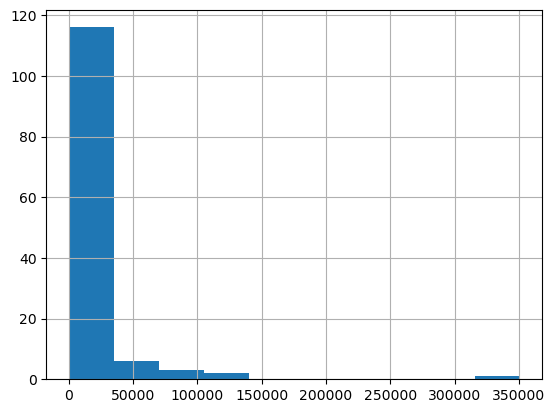

In [ ]:
libraries["registeredusers"].hist()

This is a right-skewed distribution. The majority of Oregon libraries do not have many registered users, because Oregon is so sparsely populated outside the Willamette Valley, so most of the distribution is bunched on the left.

We can adjust histograms by passing in a different number of bins as an argument.

<Axes: >

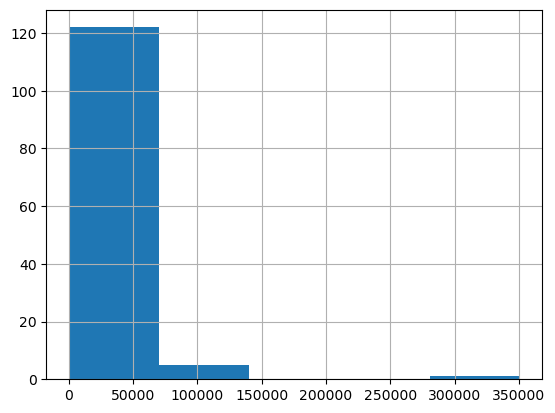

In [ ]:
libraries["registeredusers"].hist(bins=5)

For modeling purposes, we might to *scale* a highly irregular variable using a logarithmic function. Luckily, the standard Python math module has [logarithmic functions](https://docs.python.org/3/library/math.html#math.log2) like **log2** available.

In [ ]:
from math import log2 # log base 2
print(log2(8))
print(log2(256))

3.0
8.0


Let's use **Series.map** to create a new column called `log_regusers`. We do not use parentheses because **.map()** will call the function on each value in the column individually for us.

In [ ]:
libraries["log_regusers"] = libraries["registeredusers"].map(log2) # Pass by func name

Use `.hist()` to plot the new column.

<Axes: >

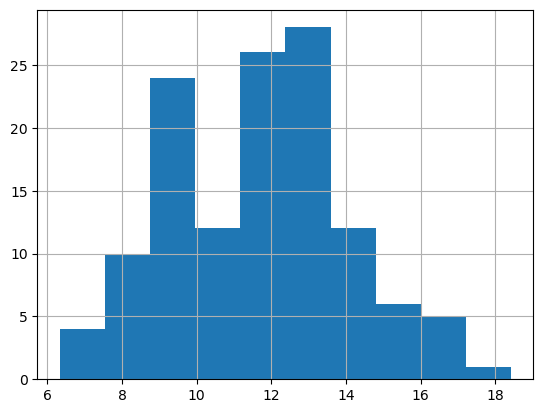

In [ ]:
libraries["log_regusers"].hist()

### Edge Case: Functions that Take in More than One Argument

Let's say you want to apply that takes in an additional argument. For example, the **math.log** functions takes in a second argument representing the base of the logarithm.

In [ ]:
import math
math.log(100, 10) # log base 10 of 100

2.0

Let's say you want to get the log base 10 of the `"facilitiessqfttotal"` column. Pass additional arguments to the [**Series.apply()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) function by using the `args=` parameter. You can think of `.apply()` as a more flexible and powerful version of `.map()`.

In [ ]:
libraries["facilitiessqfttotal"].apply(math.log, args=(10,))

0      2.628389
1      2.937016
2      4.691700
3      3.970812
4      2.982271
         ...   
131    4.457534
132    3.571243
133    4.340008
134    2.948413
135    3.622421
Name: facilitiessqfttotal, Length: 136, dtype: float64